In [259]:
"""
Comparison of accuracy of different classifiers. 

Classifiers used

1.KNN.
2.Naive Bayes.
3.Random Forest.
4.Linear

"""

'Assignment 2\n\nClassifiers used\n\n1.KNN.\n2.Naive Bayes.\n3.Random Forest.\n4.Linear\n\n'

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt; plt.rcdefaults()

In [238]:
#To display figures inline, because jupyter notebook doesnt have the option to open themm in new window.
%matplotlib inline

In [96]:
corpus=open('C:\\Users\\Bilal\\Downloads\\badges.data').read()

In [97]:
listCorpus=corpus.split('\n')
listCorpus.remove(listCorpus[0])
listCorpus.remove(listCorpus[-1])

In [128]:
X, y = [], []
for row in listCorpus:
    label = row[:1]
    name = row[2:]
    X.append(name)
    y.append(label)

In [220]:
#Q Trying different parameteres with Count Vectorizer
countVect=CountVectorizer(max_features=100,max_df=3,stop_words='english',lowercase='true',binary='true')
K=countVect.fit_transform(X)

In [221]:
voc=countVect.vocabulary_
li=countVect.get_feature_names()

In [222]:
#Trying TfidifTransformer with smooth_idf
TfidfVec=TfidfTransformer(smooth_idf=True)
vecData=TfidfVec.fit_transform(K)

In [233]:
#Different Classifiers used.
knnc=KNeighborsClassifier(n_neighbors=3,algorithm='auto')
navBer=BernoulliNB()
RFC = RandomForestClassifier(max_depth=2)
linearSVC = LinearSVC(random_state=0, tol=1e-5)

In [234]:
train_x, test_x, train_y, test_y = train_test_split(K, y, shuffle = True, train_size = 0.7,test_size=0.3)

In [235]:
knnc.fit(train_x,train_y)
navBer.fit(train_x,train_y)
RFC.fit(train_x,train_y)
linearSVC.fit(train_x,train_y)

C:\Users\Bilal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [253]:
#Accuracies of different classifiers
knnPre=knnc.predict(test_x)
navPre=navBer.predict(test_x)
RFCPre=RFC.predict(test_x)
linearPre=linearSVC.predict(test_x)
print('Accuracy knn: ', accuracy_score(test_y, knnPre))
print('Accuracy nav: ', accuracy_score(test_y, navPre))
print('Accuracy RFC: ', accuracy_score(test_y, RFCPre))
print('Accuracy Linear: ', accuracy_score(test_y, linearPre))

Accuracy knn:  0.7191011235955056
Accuracy nav:  0.6966292134831461
Accuracy RFC:  0.6741573033707865
Accuracy Linear:  0.7191011235955056


In [260]:
#Work for plotting
A=accuracy_score(test_y, knnPre)
B=accuracy_score(test_y, navPre)
C=accuracy_score(test_y, RFCPre)
D=accuracy_score(test_y, linearPre)
objects = ('KNN', 'NAIVE', 'RFC', 'LINEAR')
accu=[A,B,C,D]

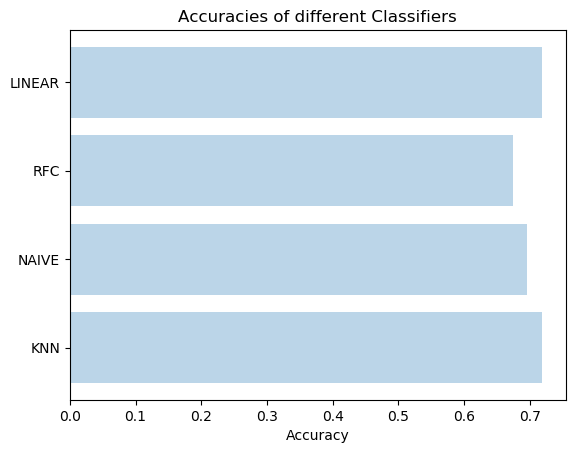

In [257]:
plt.barh([1,2,3,4], accu, align='center', alpha=0.3)
plt.yticks([1,2,3,4], objects)
plt.xlabel('Accuracy')
plt.title('Accuracies of different Classifiers')
plt.show()

In [ ]:
#Top 3 classifiers
#Linear
#KNN
#RFC